In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd
import random

In [2]:
ls german-traffic-signs

 Volume in drive E has no label.
 Volume Serial Number is 30BB-E179

 Directory of e:\COURSERA CERTIFICATE\A complete course on Autonomous driving\findings-lanes\german-traffic-signs

01-05-2023  20:20    <DIR>          .
21-05-2023  04:10    <DIR>          ..
01-05-2023  20:20             1,043 signnames.csv
01-05-2023  20:20        38,888,118 test.p
01-05-2023  20:20       107,146,452 train.p
01-05-2023  20:20        13,578,712 valid.p
               4 File(s)    159,614,325 bytes
               2 Dir(s)  230,224,596,992 bytes free


In [3]:
np.random.seed(0)

In [4]:
with open('german-traffic-signs/train.p','rb') as f:
    train_data=pickle.load(f)
with open('german-traffic-signs/valid.p','rb') as f:
    val_data=pickle.load(f)
with open('german-traffic-signs/test.p','rb') as f:
    test_data=pickle.load(f)

X_train,y_train=train_data['features'],train_data['labels']
X_val,y_val=val_data['features'],val_data['labels']
X_test,y_test=test_data['features'],test_data['labels']

In [5]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [6]:
assert(X_train.shape[0]==y_train.shape[0]),'The number of images is not equal to the number of labels.'
assert(X_test.shape[0]==y_test.shape[0]),'The number of images is not equal to the number of labels.'
assert(X_val.shape[0]==y_val.shape[0]),'The number of images is not equal to the number of labels.'
assert(X_train.shape[1:]==(32,32,3)),"The dimensions of the images are not 32*32*3"
assert(X_test.shape[1:]==(32,32,3)),"The dimensions of the images are not 32*32*3"
assert(X_val.shape[1:]==(32,32,3)),"The dimensions of the images are not 32*32*3"


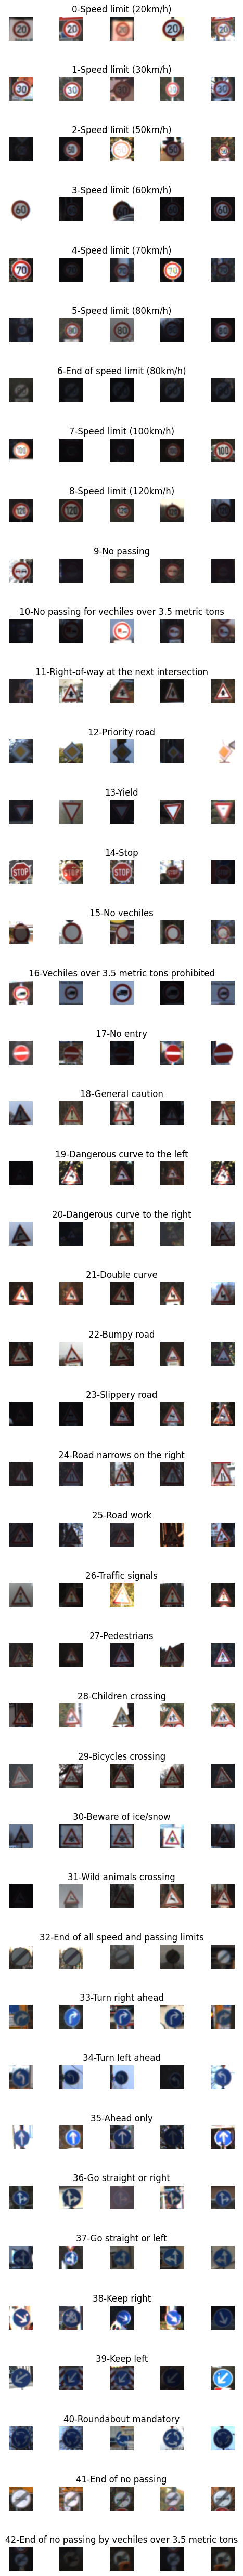

In [7]:
df=pd.read_csv("german-traffic-signs/signnames.csv")
num_of_samples=[]
cols=5
num_classes=43

fig,axs=plt.subplots(nrows=num_classes,ncols=cols,figsize=(5,50))
fig.tight_layout()

for i in range(cols):
    for j,row in df.iterrows():
        x_selected=X_train[y_train==j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected)-1)),:,:],cmap=plt.get_cmap("gray"))
        axs[j][i].axis('off')
        if i==2:
            axs[j][i].set_title(str(j) + "-" + row["SignName"])
            num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

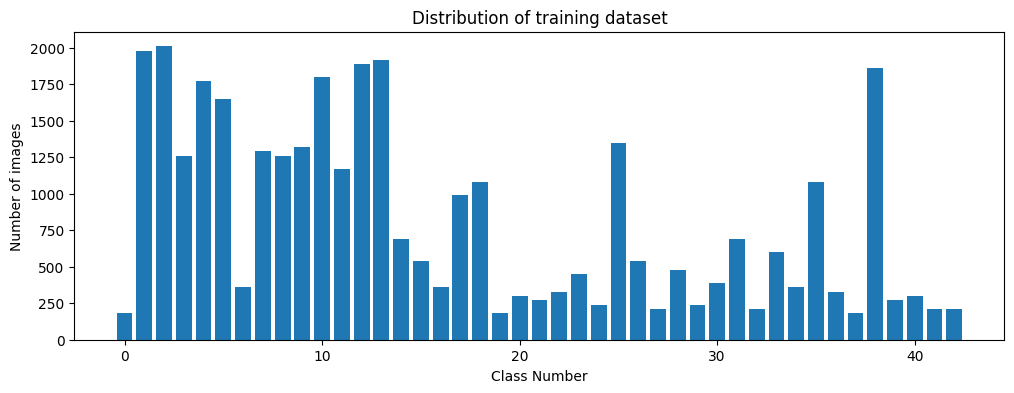

In [8]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title("Distribution of training dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of images")

(32, 32, 3)
36


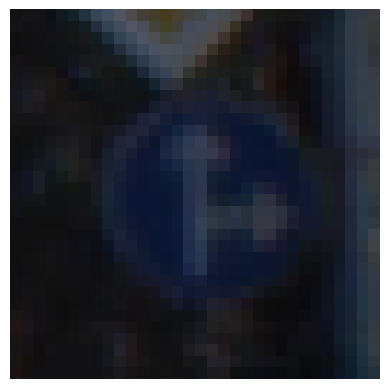

In [9]:
import cv2

plt.imshow(X_train[1000])
plt.axis('off')
print(X_train[1000].shape)
print(y_train[1000])

(32, 32)


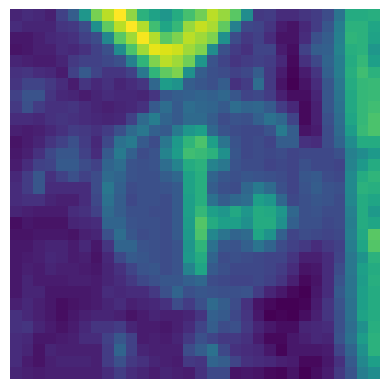

In [10]:
def grayscale(img):
    gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return gray_img

img=grayscale(X_train[1000])
plt.imshow(img)
plt.axis('off')
print(img.shape)

(32, 32)


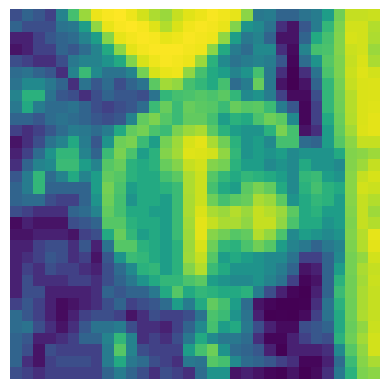

In [11]:
def equalize(img):
    img=cv2.equalizeHist(img)
    return img

img=equalize(img)
plt.imshow(img)
plt.axis('off')
print(img.shape)

In [12]:
def preprocessing(img):
    img=grayscale(img)
    img=equalize(img)
    img=img/255
    return img

X_train=np.array(list(map(preprocessing,X_train)))
X_val=np.array(list(map(preprocessing,X_val)))
X_test=np.array(list(map(preprocessing,X_test)))

(34799, 32, 32)


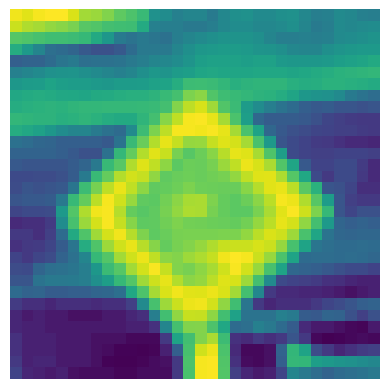

In [13]:
plt.imshow(X_train[random.randint(0,len(X_train)-1)])
plt.axis('off')
print(X_train.shape)

In [14]:
X_train=X_train.reshape(34799,32,32,1)
X_test=X_test.reshape(12630,32,32,1)
X_val=X_val.reshape(4410,32,32,1)

In [15]:
from keras.preprocessing.image import ImageDataGenerator
dfgen=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1,rotation_range=10)
dfgen.fit(X_train)

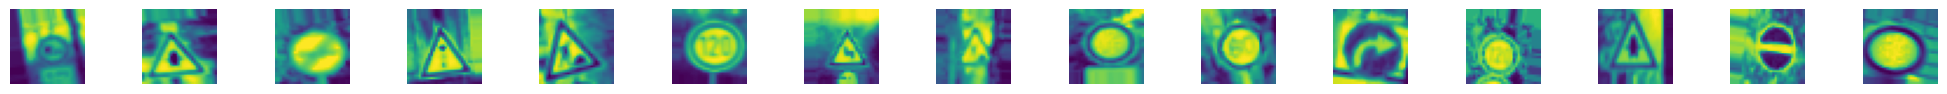

In [16]:
batches=dfgen.flow(X_train,y_train,batch_size=20)
X_batch,y_batch=next(batches)
fig,axs=plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32,32))
    axs[i].axis('off')

In [17]:
y_train=to_categorical(y_train,43)
y_val=to_categorical(y_val,43)
y_test=to_categorical(y_test,43)

In [18]:
def LeNet_model():
    model=Sequential()
    model.add(Conv2D(60,(5,5),input_shape=(32,32,1),activation='relu'))
    model.add(Conv2D(60,(5,5),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(30,(3,3),activation='relu'))
    model.add(Conv2D(30,(3,3),activation='relu'))
    #model.add(Dropout(0.5))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(500,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes,activation='softmax'))
    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [19]:
model=LeNet_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 60)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                    

c:\Users\kashyap\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [20]:
history=model.fit_generator(dfgen.flow(X_train,y_train,batch_size=50),steps_per_epoch=20000,epochs=10,validation_data=(X_val,y_val),shuffle=1)

Epoch 1/10


C:\Users\kashyap\AppData\Local\Temp\ipykernel_8936\363236080.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(dfgen.flow(X_train,y_train,batch_size=50),steps_per_epoch=20000,epochs=10,validation_data=(X_val,y_val),shuffle=1)


20000/20000 [==============================] - 73s 4ms/step - loss: 1.6955 - accuracy: 0.5173 - val_loss: 0.3053 - val_accuracy: 0.9086


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [98]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.13429996371269226
Test accuracy: 0.9618368744850159


(32, 32)
1/1 [==============================] - 0s 90ms/step
predicted sign: [31]


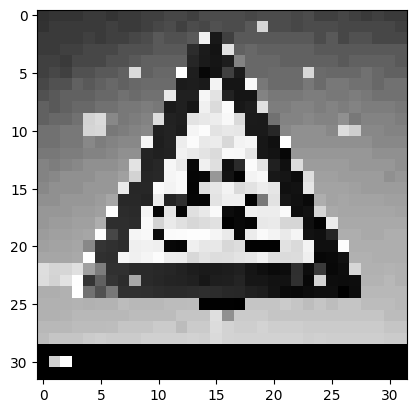

In [99]:
#fetch image
 
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
 
#Preprocess image
 
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
 
#Reshape reshape
 
img = img.reshape(1, 32, 32, 1)
 
#Test image
print("predicted sign: "+ str(np.argmax(model.predict(img), axis=-1)))
